# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [66]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [67]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [68]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [69]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: re.sub("€", "", x))
fifa['ValueNumeric'] = fifa['ValueNumeric'].apply(lambda x: re.sub("M", "", x))
fifa['ValueNumeric'] = fifa['ValueNumeric'].apply(lambda x: re.sub("K", "", x))

In [70]:
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('float')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [71]:
fifa['foot']=fifa['Preferred Foot'] 

In [72]:
fifa2 = fifa.dropna()

In [73]:
fifaNew = fifa2[['foot', 'Position', 'ValueNumeric']]

In [74]:
fifaNew

,foot,Position,ValueNumeric
0,Left,RF,110.5
1,Right,ST,77.0
2,Right,LW,118.5
3,Right,GK,72.0
4,Right,RCM,102.0
...,...,...,...
18202,Right,CM,60.0
18203,Right,ST,60.0
18204,Right,ST,60.0
18205,Right,RW,60.0


In [75]:
# Your code here:
my_lm = ols('ValueNumeric ~ C(foot)*C(Position)', data=fifa2).fit()

# This is how you do it with no interaction
#my_lm = ols('ValueNumeric ~ C(foot)+C(Position)', data=fifa2).fit()

In [76]:
table = sm.stats.anova_lm(my_lm, typ=1) # Type 2 ANOVA DataFrame

In [77]:
table

,df,sum_sq,mean_sq,F,PR(>F)
C(foot),1.0,2.841468e+05,284146.827882,3.393076,6.548728e-02
C(Position),26.0,8.989494e+06,345749.751197,4.128693,8.245701e-12
C(foot):C(Position),26.0,3.116445e+06,119863.286108,1.431321,7.169962e-02
Residual,17864.0,1.495988e+09,83743.146225,NaN,NaN


What is your conclusion from this ANOVA?

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [78]:
# Your code here:

fifaNewTwo = fifa2[['Nationality', 'ValueNumeric']]
my_lmTwo = ols('ValueNumeric ~ C(Nationality)', data=fifaNewTwo).fit()
tableTwo = sm.stats.anova_lm(my_lmTwo, typ=1) # Type 2 ANOVA DataFrame
tableTwo

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),162.0,3.488718e+07,215352.982487,2.594922,1.928078e-24
Residual,17755.0,1.473490e+09,82990.169913,NaN,NaN


What is your conclusion from this ANOVA?

In [79]:
# There is definitely a significant difference in terms of nationality.
# That is, nationality significantly effects earnings

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [80]:
# Your code here:
import statsmodels.api as sm

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [81]:
# Your code here:
X = fifa2[["SprintSpeed", "Stamina"]]
y = fifa2['ValueNumeric']
X = sm.add_constant(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
model = sm.OLS(y, X).fit()

# predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Tue, 11 Feb 2020   Prob (F-statistic):             0.0116
Time:                        17:01:25   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [84]:
# Your conclusions here:
# The model does not have a good fit because the R squared is zero,
# This means that we are not explaining practically any of the variatin

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [85]:
# Your code here:
X = fifa2[["Potential"]]
y = fifa2['ValueNumeric']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):          9.15e-225
Time:                        17:01:25   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [86]:
# Your conclusions here:
# The R Squared 0.056 this means that our indenpendant varaibles are only explaining 5% of the variation
# in the data

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [87]:
# Your code here:
import seaborn as sns

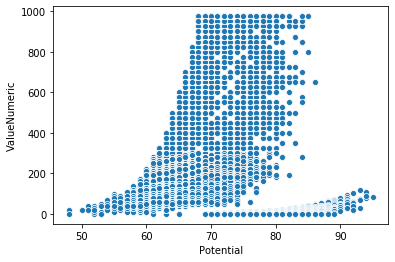

In [88]:
sns.scatterplot(fifa2['Potential'], fifa2['ValueNumeric']);